<a id=top></a>

# Cross Platform Measurements

<br>

 <center> <img src=img/cross_platform2.png  width=32%> </center> 


## Notebook Overview

### <a href='#intro'> 1) Intro to measuring cross platform information spread</a>
 
### <a href='#data'> 2) Imports and data loading</a>

### <a href='#meas'> 3) Measuring properties of information spread</a>

### <a href='#bonus'> 6) Bonus Exercise </a>

<a id='intro'></a>

### Introduction
[Jump to top](#top)

The measurements discussed so far have either focused on measuring information spread on individual platforms or the total amount of spread across all observed platforms.  To begin to study *cross-platform* spread, we developed measurements that compares patterns of spread for the same information unit across multiple platforms.

There are many possible connections between different platforms:
1. **Content links**: A user may post a link to content on another platform. This provides a clear connection as to the source of the information that the user posted.
<img src="img/cross_platform.png?1" width="800"/>
2. **User links**: The same user may be active on multiple platforms.  If the same user posts the same content across multiple platforms, we may infer that they had some third source for that information (which we may not be able to observe) Or if we see user respond on one platform and then post the same content on another platform, we can infer that the first platform was the likely source of the information.
 <img src="img/user_matching.png?1" width="800"/>


### Cross-Platform User Linking

1. **User-name similarity**: While this may work well for highly-unique usernames, it is likely to suffer from false positives for more common ones.
2. **Direct user linking between profiles**: On some platforms, users may provide links to their other social media accounts. For example, a user's Twitter profile may encourage others to also follow their Instagram, or a LinkedIn profile may contain links to the user's GitHub and Twitter accounts.
3. **Machine learning models**: Machine learning models can leverage complex features based on the username, the user interests, and the user social connections to make predictions about cross-platform user merging.


### Measurements

The cross-platform meausrements probe the same four key information spread dimensions as the multi-platform measurements:
1. Shares
2. Audience
3. Lifetime
4. Speed

But these measurements focus on how these quantities compare between platforms.  The measurements answer:

1. **Order of spread**: Which platform does the information reach first? How long does it take for the information to show up on the second platform after it reaches the first?
2. **Platform rankings**: On which platform does the information spread most/fastest/longest/to the most people?
3. **Temporal correlations**: How correlated is the spread of the information across each pair of platforms?
4. **Ranking correlations**: Do the same pieces of information spread the most/fastest/longest/to the most people on different pairs of platforms?


<a id='data'></a>

###  Imports
[Jump to top](#top)

In [1]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')
import socialsim as ss

/Users/grac833/anaconda3/envs/socsim_test_env2/lib/python3.6/site-packages/pysal/lib/weights/util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')
/Users/grac833/anaconda3/envs/socsim_test_env2/lib/python3.6/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql
/Users/grac833/Documents/Projects/SocialSim/temp/temp/socialsim_package_docker/socialsim/measurements/social_structure.py:13: UserWarning: SNAP import failed. Using igraph version of code instead.
  warnings.warn('SNAP import failed. Using igraph version of code instead.')


### Load the dataset
[Jump to top](#top)

In [2]:
dataset_path = '../data/tutorial_cross-platform.json'
dataset = ss.load_data(dataset_path, verbose=False)

### Instantiate measurement object
[Jump to top](#top)

In [3]:
cross_platform = ss.CrossPlatformMeasurements(dataset)

In [4]:
cross_platform.list_measurements()

1) correlation_of_information: Compute Pearson correlation
            1. Correlation between shares of information across platforms
            2. Correlation between audience sizes
            3. Correlation between lifetimes (default = days) of information across platforms
            4. Correlation between speeds (default = days) of information across platforms
2) lifetime_of_spread: Ranks the different platforms based on the lifespan (default = days) of the content/community
3) order_of_spread: Determine the order of spread between platforms of content
4) overlapping_users: Calculate the percentage of users common to all platforms (that share in a community/content)
5) size_of_audience: The ranking of audience sizes on each platform
6) size_of_shares: Determine the number of shares on each platform
7) speed_of_spread: Determine the speed at which the information is spreading
8) temporal_correlation: Calculates the correlation between the activity time series  between all pairs of 

<a id='meas'></a>

### Run individual measurents
[Jump to top](#top)

We can compare what order each pariticular piece of information shows up the three platforms we are studying.

In [5]:
cross_platform.order_of_spread(node_level=True)

{'CVE-2015-0235': ['reddit', 'github', 'twitter'],
 'CVE-2015-1805': ['github', 'reddit', 'twitter'],
 'CVE-2015-3864': ['reddit', 'github', 'twitter'],
 'CVE-2015-6620': ['reddit', 'github'],
 'CVE-2016-0777': ['github', 'reddit', 'twitter'],
 'CVE-2016-10033': ['github', 'reddit', 'twitter'],
 'CVE-2017-0037': ['twitter'],
 'CVE-2017-0059': ['twitter'],
 'CVE-2017-0199': ['twitter'],
 'CVE-2017-8295': ['twitter'],
 'crashoverride': ['twitter', 'reddit'],
 'industroyer': ['twitter'],
 'nmap': ['twitter', 'reddit'],
 'notpetya': ['reddit', 'twitter'],
 'plugx': ['twitter'],
 'vbs': ['reddit', 'twitter']}

We see that for vulnerability identifiers, if they are discusseed on muliple platforms they are most likely to show up on GitHub or Reddit first but if they are also often discussed only on Twitter. For the malware related keywords we have only collected Twitter and Reddit data (which is why GitHub does not show up for those info IDs).

If we want to aggregate these results, we can run the population-level version of this measurement which calculates the percent of the time that a paricular platform is first, second, and third across the population of information units.

In [6]:
cross_platform.order_of_spread()

,platform,rank,value
0,github,0,0.500000
1,reddit,0,0.500000
2,twitter,0,0.222222
3,github,1,0.500000
4,reddit,1,0.500000
5,twitter,1,0.222222
6,github,2,0.000000
7,reddit,2,0.000000
8,twitter,2,0.555556


These aggregate results are only for information units that spread across multiple platforms.  We see that (for this very small sample), information is more likely to start spreading on GitHub or Reddit and later appear on Twitter.


     informationID  level_1            nodeTime next_platform_timestamp  \
0    CVE-2015-0235        0 2015-01-27 15:43:09     2015-01-27 17:05:58   
1    CVE-2015-0235        1 2015-01-27 15:43:09     2016-03-09 16:15:46   
2    CVE-2015-0235        2 2015-01-27 17:05:58     2016-03-09 16:15:46   
3    CVE-2015-1805        0 2015-06-08 17:41:21     2016-03-19 06:42:29   
4    CVE-2015-1805        1 2015-06-08 17:41:21     2016-03-19 08:38:17   
5    CVE-2015-1805        2 2016-03-19 06:42:29     2016-03-19 08:38:17   
6    CVE-2015-3864        0 2015-08-14 01:58:02     2015-08-14 21:51:04   
7    CVE-2015-3864        1 2015-08-14 01:58:02     2016-03-27 03:01:58   
8    CVE-2015-3864        2 2015-08-14 21:51:04     2016-03-27 03:01:58   
9    CVE-2015-6620        0 2015-12-10 07:40:38     2015-12-13 18:02:08   
10   CVE-2016-0777        0 2016-01-14 14:17:47     2016-01-14 14:36:39   
11   CVE-2016-0777        1 2016-01-14 14:17:47     2016-07-14 06:21:21   
12   CVE-2016-0777       

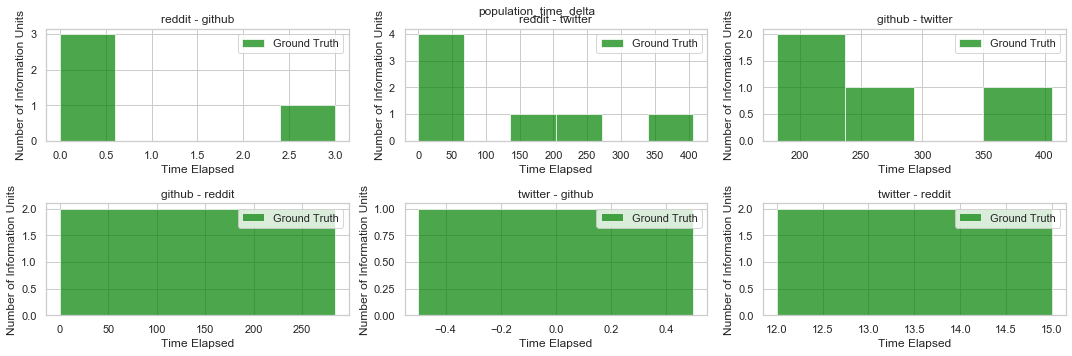

In [7]:
meas = cross_platform.time_delta(time_granularity='D')

ss.generate_plot(
    meas, 
    measurement_name='population_time_delta',
    show=True
    )

Because we only have a small sample here, we can't make strong conclusions for these distributions but we see that there is sometimes a very large time gap betewen when a piece of information first shows up on one platform to when it first shows up on another. In particular, when information appears first on GitHub and then later on Twitter the time gap is close to a year.  In contrast, the information that appears first on Greddit and then on GitHub appears on GitHub within several days of the first Reddit appearance.

We can also study whether the same information units tend to be prominent on different pairs of platforms.  For example, are the same software vulnerabilities discussed on both Twitter and Reddit? Therefore, we look at the spearman correlatin of the top-k ranking of information units by number of shares.

In [8]:
cross_platform.correlation_of_information(measure='share')

,platform1,platform2,value
0,github,reddit,0.673206
1,github,twitter,-0.106537
2,reddit,twitter,0.087642


We see that the same pieces of information tend to be prominently discusssed on both GitHub and Reddit while the correlation between the most discussed information is low between Twitter and the other platforms.

We can also explore whether sharing behavior tends to be temporally correlated across multiple platforms for the same peice of information.

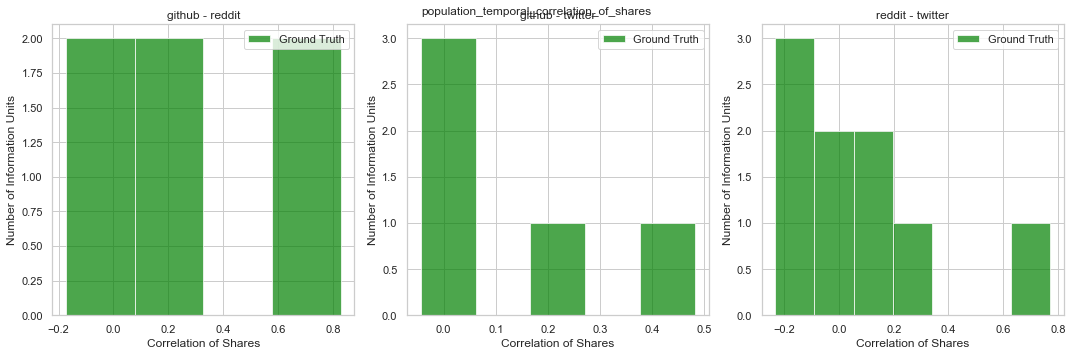

In [9]:
meas = cross_platform.temporal_correlation(measure='share')

ss.generate_plot(
    meas, 
    measurement_name='population_temporal_correlation_of_shares',
    show=True
    )

We see that typically there is little temporal correlation between sharing time series on each pair of platforms.  Even if the same piece of information appears on multiple platforms, it is typically being shared at different times.

<a id='bonus'></a>

### Bonus Exercise
[Jump to top](#top)

Given the following dataset related to discussion of several cryptocurrencies discussed on Twitter and Reddit, identify which platform has the largest audience for these coins and which platform they appear on first.

In [10]:
dataset_path = '../data/tutorial_cross-platform_bonus.json'
dataset = ss.load_data(dataset_path, verbose=False)

dataset.head()

,actionType,communityID,informationID,nodeID,nodeTime,nodeUserID,parentID,platform,rootID,urlDomains
0,tweet,NaN,pesetacoin,xT2oPbm5lEKmnUaulpfpHg,2017-04-20 00:08:12,QBOQekSL7T9wGH00LoMJdQ,xT2oPbm5lEKmnUaulpfpHg,twitter,xT2oPbm5lEKmnUaulpfpHg,NaN
1,tweet,NaN,pesetacoin,_ilXd9xKnC3eiG9DU0oO1w,2017-04-20 00:09:12,QBOQekSL7T9wGH00LoMJdQ,_ilXd9xKnC3eiG9DU0oO1w,twitter,_ilXd9xKnC3eiG9DU0oO1w,NaN
2,tweet,NaN,pesetacoin,L62zgHQH68ICW5ZdR2Vs0Q,2017-04-20 00:10:55,QBOQekSL7T9wGH00LoMJdQ,L62zgHQH68ICW5ZdR2Vs0Q,twitter,L62zgHQH68ICW5ZdR2Vs0Q,NaN
3,retweet,NaN,ubiq,fkh1kvOdDT1ktNxe1CXyHg,2017-04-20 00:14:54,T3TgoScoG7rQG4OkQxISUg,lM-rbdaIsIfiU4flXHUtWw,twitter,lM-rbdaIsIfiU4flXHUtWw,NaN
4,tweet,NaN,peercoin,Vo6p3wJTaUOSMEPCQg7Iiw,2017-04-20 00:35:03,A2D2li2KEUmnd94e49fgHg,Vo6p3wJTaUOSMEPCQg7Iiw,twitter,Vo6p3wJTaUOSMEPCQg7Iiw,NaN


**Do these coins reach a larger audience on Twitter or Telegram?**

**Does discussion tend to start on Twitter or Telegram?**

**How many days elapse between the first appearance on one platform and the first appearance on another?**